# Unitary and open dynamics of a spin-1/2 system

We consider the dynamics of a generic spin-1/2 system (or *two-level system*, *qubit*) generated by some interaction Hamiltonian, with and without the effect of a noisy environment causing deocherence.

We will use arbitary units and set $\hbar\equiv1$

## Import modules and packages

In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Hamiltonian


Set up the bare (or *internal*) Hamiltonian of the system as

$H_0 = \frac{\omega_0}{2}\sigma_z$, where $\sigma_x,\sigma_y,\sigma_z$ are the [Pauli matrices](https://en.wikipedia.org/wiki/Pauli_matrices):

\begin{aligned}\sigma _{\mathrm {x} }&={\begin{pmatrix}0&1\\1&0\end{pmatrix}}\\\sigma _{\mathrm {y} }&={\begin{pmatrix}0&-i\\i&0\end{pmatrix}}\\\sigma _{\mathrm {z} }&={\begin{pmatrix}1&0\\0&-1\end{pmatrix}}\\\end{aligned}

Alternatively, pick any time-independent Hamiltonian of your choice.

In [8]:
# energy gap between ground and excited states
w0 = 1

# pauli matrices
sigmax = np.array([[0,1],[1,0]])
sigmay = np.array([[0,-1j],[1j,0]])
sigmaz = np.array([[1,0],[0,-1]])

# bare Hamiltonian 
H0 = w0*sigmaz/2 

## State vector

Calculate the ground ($g$) and excited ($e$) states of the bare Hamiltonian. If you picked $H_0=\omega_0\sigma_z/2$ you should get:

- $H_0|g\rangle = -\frac{\omega_0}{2}|g\rangle$
- $H_0|e\rangle = +\frac{\omega_0}{2}|e\rangle$

Construct any state $|\psi\rangle$ of your choice and calculate its energy $E$ with respect to $H_0$,
- $|\psi\rangle = c_g|g\rangle + c_e|e\rangle$, with $c_g^2+c_e^2 = 1$
- $E = \langle \psi|H_0|\psi\rangle$

To calculate sorted eigenvalues and eigenvectors, you can use the `eigensorter` method in `tools`.

In [9]:
# import eigen-sorter
from tools import eigensorter

# sorted eigenstates and eigenvectors
evals, evecs = eigensorter(H0) 

# import norm
from scipy.linalg import norm

# # --- state vector ----
cg,ce = 1j,2                          # coefficients
psi = cg*evecs[0]+ce*evecs[1]         # state vector
psi /= norm(psi)                      # normalisation

# energy
E = psi.conj().T @ H0 @ psi
print('Energy E =',E);

Energy E = (0.3+0j)


## Density operator

Represent the state $|\psi\rangle$ as a density operator and calculate the expectation value of the following hermitian operator (associated with some observable) $O = \sigma_y$

- from $|\psi\rangle \to \rho = |\psi\rangle\langle\psi|$
- expectation value as $\langle O\rangle  = \mathrm{Tr}[O\rho]$

Check if $\rho$ is a state by testing the three properties of density operators:
1. Unit trace: $\mathrm{Tr}[\rho]=1$
2. Self adjoint: $\rho^\dagger=\rho$
3. Positive semi-definite: $\rho >0$

In [13]:
# density operator from state vector
rho = np.outer(psi, psi.conj().T)

# expectation value
O = sigmay
expO = np.trace(O @ rho)
print('<O> = ', expO);

# check if it is a state
print('unit trace:', np.real(np.around(np.trace(rho)-1,15)) == 0.0 )  # machine precision ~1e-16
print('self-adjoint:', np.array_equal(rho,rho.T.conj()))
print('positive semi-definite:', bool(np.prod(np.linalg.eigvals(rho) >= 0)))

<O> =  (0.7999999999999999+0j)
unit trace: True
self-adjoint: True
positive semi-definite: True


## Bloch representation

Any qubit density operator $\rho$ can be represented as a vector in a real 3D vector space $\vec{r} = (r_x,r_y,r_z)$ as:

$\rho =  \frac{\mathbb{1}+\vec{r}\cdot\vec{\sigma}}{2}$,

where $\vec{\sigma} = (\sigma_x,\sigma_y,\sigma_z)$ is a symbolic vector of Pauli operators. This is called the [Bloch representation](https://en.wikipedia.org/wiki/Bloch_sphere). The vector $\lVert\vec{r}\rVert \leq 1$ belongs to a ball of radius 1 called the Bloch ball, whose surface (the Bloch sphere) contains only pure states and whose interior contains only mixed states.

- Calculate the expectation value of all three Pauli operators $\sigma_x,\sigma_y,\sigma_z$
- Group the expecation values into the Bloch vector $\vec{r} = (r_x,r_y,r_z)$, with $r_k = \langle\sigma_k\rangle$.
- Represent the state on the Bloch-sphere (use `plt_sphere` from the `tools` library)

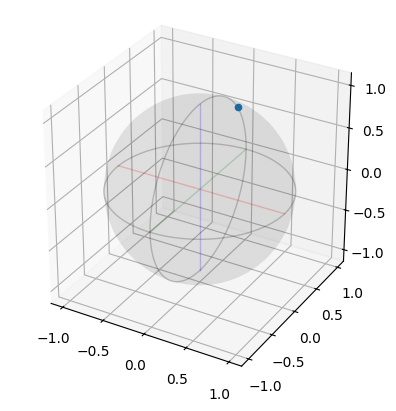

In [20]:
# "vector" (list) of pauli operators 
sigma = [sigmax,sigmay,sigmaz]

# expectation value of all the Pauli operators
r = np.array([np.real(np.trace(s @ rho)) for s in sigma])

# sphere plotting tool
from tools import plt_sphere

# interactive plot 
interactive = False
if interactive:
    # use qt5 interactive backend
    %matplotlib qt5
else:
    # use inline backend
    %matplotlib inline

# Bloch sphere representation
fig = plt.figure()
# create a 3D projective axis
ax = plt.axes(projection='3d')
# plot the Bloch vector
ax.scatter(*r);
# isometric aspect ratio
ax.set_box_aspect([1,1,1])
# plot the sphere for reference
plt_sphere(ax);

## Purity and entropy

Calculate:

- the purity $\mathcal{P}[\rho] = \mathrm{Tr}[\rho^2]$, and
- the von Neumann entropy $S[\rho] = \mathrm{Tr}[\rho\log\rho]$

In [21]:
# purity
purity = np.real(np.trace(rho @ rho))
print('purity = ',purity)

# von Neumann entropy
def entropy_vn(rho):
    evals, evecs = np.linalg.eig(rho)
    ids = evals.argsort()
    evals = evals[ids]
    evecs = evecs[:,ids]
    return -np.real(np.sum([val*np.log(val) for val in evals if val > 0]))
    
# show entropy
S = entropy_vn(rho)
print('entropy = ',S)

purity =  0.9999999999999998
entropy =  3.330669073875469e-16


## Unitary dynamics

Calculate the unitary dynamics $U(t)$ generated by some time-independent Hamiltonian $H = H_0 + H_1$ of your choice,  with $U(t) = \exp(-i H t)$, for both the state vector and the density operator.

Then, propagate the initial state $|\psi\rangle$:

- $|\psi(t)\rangle = U(t)|\psi\rangle$,
- $\rho(t) = U(t)\rho U(t)^\dagger$,

and study the time-dependent expectation value of some operator $O$, $\langle O(t)\rangle = \langle \psi(t)|O|\psi(t)\rangle$.

Then, repeate these calculations using a time-dependent Hamiltonian of your choice, such as $H(t) = \sin(\omega t)\sigma_z$

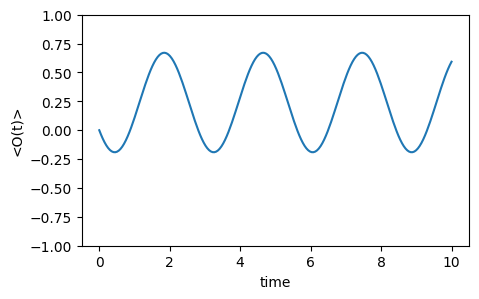

In [22]:
# driving frequency
w1 = 2.

# interaction Hamiltonian
H1 = w1*sigmax/2

# total Hamiltonian
H = H0+H1

# import expm
from scipy.linalg import expm

# unitary operator at time t
U = lambda t, H = H: expm(-1j * H * t)

# propagation
prop = lambda U,rho : U @ rho @ U.conj().T

# expectation value
expect = lambda operator,state : np.real(np.trace(operator @ state))

# ----- dynamics ------

t0,tf = 0,10                      # initial, final time
steps = 200                      # timesteps
times = np.linspace(t0,tf,steps) # time span
O = sigmax                       # observable to monitor
rho0 = rho                       # initial state

# propagate and measure z
Ot = np.array([expect(O, prop(U(t),rho0)) for t in times])

# ----- plot ------
fig, ax = plt.subplots(figsize = (5,3))
ax.plot(times, Ot);
ax.set_ylim([-1,1]);
ax.set_xlabel('time');
ax.set_ylabel('<O(t)>');

### Dynamics on the Bloch sphere

Represent the dynamics from the previous step on the Bloch sphere, using $\vec{r}(t) \leftrightarrow \rho(t)$.

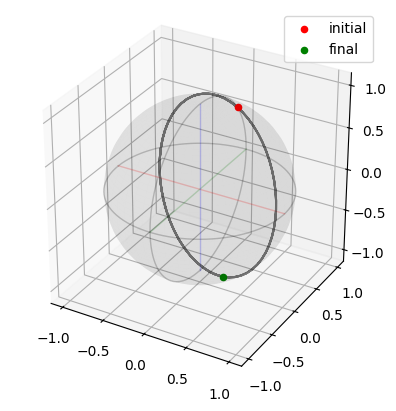

In [25]:
# function to get the Bloch vector
bloch_vector = lambda rho: np.array([np.real(np.trace(s @ rho)) for s in sigma])

# get Bloch vectors
rs = np.array([bloch_vector(prop(U(t),rho0)) for t in times])

# Bloch sphere representation
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1,1,1])
plt_sphere(ax);

# trajectory
ax.plot(*rs.T, c='k', alpha=0.5)                # trajectory on the bloch sphere
ax.scatter(*rs[0], c='r', label = 'initial')    # initial state
ax.scatter(*rs[-1], c='g',  label = 'final');   # final state
ax.legend();

## Decoherence

Now consider a system that is **also** affected by decoherence. For example, we consider an evnironment that induces random spin flips (in the basis of $H_0 \propto\sigma_z$) at some rate $\gamma$

- spin-flip operator $\sigma_x$
- spin-flip rate $\gamma$

The dynamics is generated by
$\dot{\rho} = -i [H,\rho] + \sum_{k=1}^N \gamma_k \bigg(L_k\rho L_k^\dagger - \frac{1}{2}\{L_k^\dagger L_k,\rho\}\bigg)$

The $L_k$ operators are called **Lindblad** (or *jump*, *collapse* operators) and model the incoherent transitions (such as the spin-flip) that happen at some rate $\gamma_k$. 

In practice we will re-absorb the rates in the definition of the Lindblad operators:
$L_k \to \widetilde{L}_k = \sqrt{\gamma} L_k$

To porpagate the state of the system we are going to use a *superoperator* representation (Liouville space), by reshaping the density operator into a vector (*vectorising*):

- $\rho \to \vec{\rho}$
- $\dot{\rho} \to \dot{\vec{\rho}} = \mathcal{L}\vec{\rho}$ 
- $\mathcal{L} = -i\Big(\mathbb{1} \otimes H - H^\mathrm{T}\otimes\mathbb{1}\Big) + \sum_k\gamma_k \bigg[ L_k^*\otimes L_k- \frac{1}{2} \Big(\mathbb{1}\otimes L_k^\dagger L_k + L_k^\mathrm{T} L_k^*\otimes\mathbb{1}\Big)\bigg]$
- $\vec{\rho}(t) = \exp[\mathcal{L} t]\vec{\rho}_0$

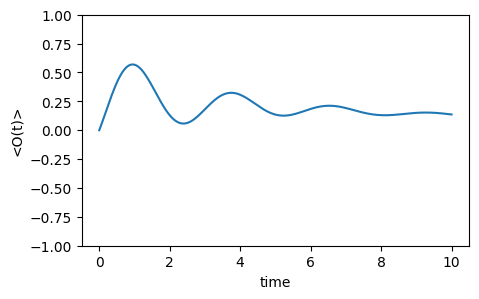

In [26]:
# function to get the Liouville superoperator
def liouvillian(H, c_ops = []):
    d = len(H) # dimension of the system
    superH = -1j * ( np.kron(np.eye(d),H)-np.kron(H.T,np.eye(d)) ) # Hamiltonian part
    superL = sum([np.kron(L.conjugate(),L) 
                  - 1/2 * ( np.kron(np.eye(d),L.conjugate().T.dot(L)) +
                            np.kron(L.T.dot(L.conjugate()),np.eye(d)) 
                          ) for L in c_ops])
    return superH + superL

# propagation 
def prop(P,rho):
    # get system dimension
    dim = rho.shape[0]
    # propagate vectorise rho
    v = P @ np.reshape(rho,(dim*dim,1))
    # return density operator
    return np.reshape(v,(dim,dim))

# rate
gamma = 0.2

# Lindblad operators
c_ops = [np.sqrt(gamma)*sigmax]

# superoperator
superoperator = liouvillian(H, c_ops)

# propagator
P = lambda t: expm(superoperator*t)

# propagate and measure z
Ot = np.array([expect(O, prop(P(t),rho0)) for t in times])

# ----- plot ------
fig, ax = plt.subplots(figsize = (5,3))
ax.plot(times, Ot);
ax.set_ylim([-1,1]);
ax.set_xlabel('time');
ax.set_ylabel('<O(t)>');

### Dynamics on the Bloch sphere

As before, but now for the decoherence process.

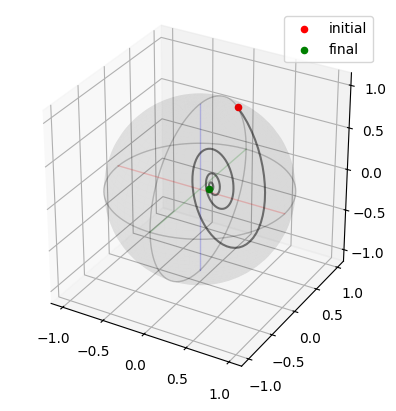

In [27]:
# Bloch sphere representation
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1,1,1])
plt_sphere(ax);

# get Bloch vectors
rs = np.array([bloch_vector(prop(P(t),rho0)) for t in times])

# trajectory
ax.plot(*rs.T, c='k', alpha=0.5)                # trajectory on the bloch sphere
ax.scatter(*rs[0], c='r', label = 'initial')    # initial state
ax.scatter(*rs[-1], c='g',  label = 'final');   # final state
ax.legend();